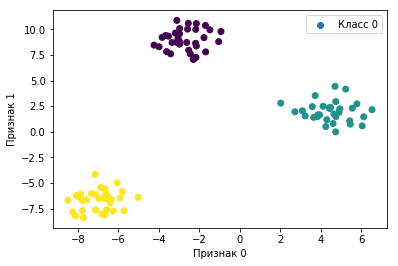

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

plt.scatter(X[:, 0],X[:, 1],c=y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])
plt.show()

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print("Форма константы: ", linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


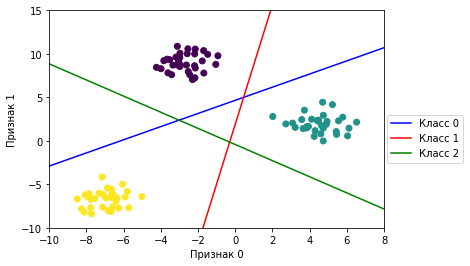

In [5]:
import numpy as np

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
'Линия класса 2'], loc=(1.01, 0.3))
plt.scatter(X[:, 0],X[:, 1],c=y)
plt.show()

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

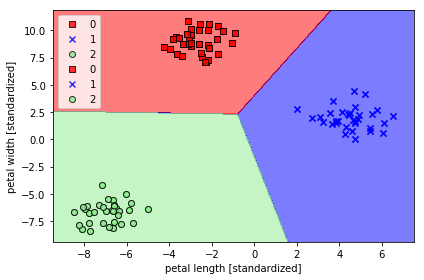

In [13]:
#X_combined_std = np.vstack((X_train_std, X_test_std))
#y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X, y,
                      classifier=linear_svm
                      #, test_idx=X
                     )
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()